# What is the RAG system?
## Defination:
This is called retrieval augmented generation (RAG), as you would retrieve the relevant data and use it as augmented context for the LLM. Instead of relying solely on knowledge derived from the training data, a RAG workflow pulls relevant information and connects static LLMs with real-time data retrieval.
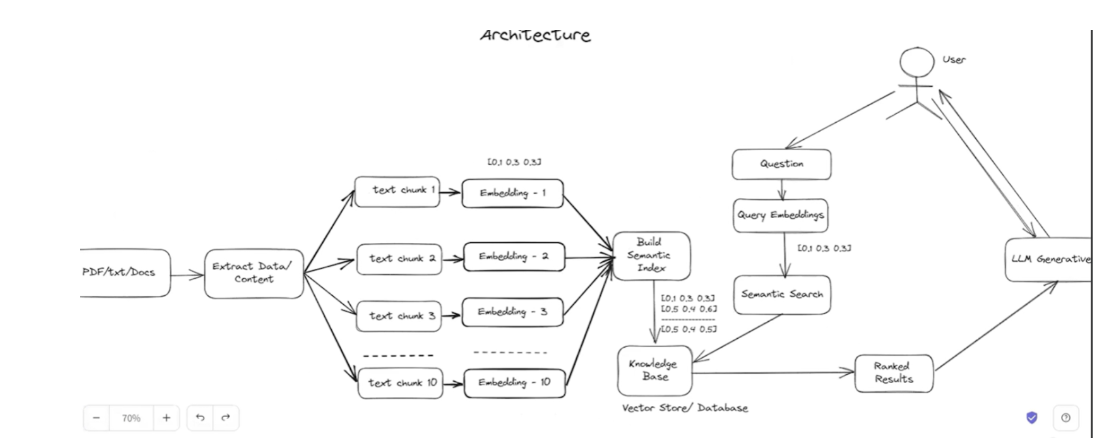


## Why we create a RAG System?
Retrieval systems (RAG) give LLM systems access to factual, access-controlled, timely information.

    RAG REDUCES HALLUCINATION

Example: In the financial services industry, providing accurate information on investment options is crucial because it directly impacts customers' purchasing decisions and financial well-being. RAG can help ensure that the information generated about stocks, bonds, or mutual funds

    COST-EFFECTIVE ALTERNATIVE

Example: Banks often need to assess the creditworthiness of potential borrowers. Fine-tuning pre-trained language models to analyse credit histories can be resource-intensive. RAG architecture offers a cost-effective alternative by retrieving relevant financial data and credit history information from existing databases, combining this with pre-trained language models

    CREDIBLE AND ACCURATE RESPONSES

Example: In customer support, providing accurate and helpful responses is essential for maintaining customer trust, as it demonstrates the company's commitment to providing reliable information and support. The RAG technique is able to do this very effectively by retrieving data from catalogues, policies, and past customer interactions to generate context-aware insights, ensuring that customers receive reliable information on product features, returns, and other inquiries.

    DOMAIN-SPECIFIC INFORMATION

Example: In the legal industry, clients often require advice specific to their case or jurisdiction because different legal systems have unique rules and regulations, and understanding these nuances is crucial for effective legal representation. RAG can access domain-specific knowledge bases, such as local statutes and case law, to provide tailored information relevant to clients' legal needs.

https://www.advancinganalytics.co.uk/blog/2023/11/7/10-reasons-why-you-need-to-implement-rag-a-game-changer-in-ai


## RAG Practical Usecase
    Document Question Answering Systems
    Conversational agents
    Real-time Event Commentary
    Content Generation
    Personalised Recommendation
    Virtual Assistants



## Installing the necessary libraries

In [1]:
!pip install langchain openai tiktoken rapidocr-onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


## Fetching OpenAI API key

In [3]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

## Setting Enviornment Variable

In [4]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY



1.   Data Ingestion
2.   Data Retreival
3.   Data Generation





### Data Ingestion

In [7]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00


In [8]:
import requests
from langchain.document_loaders import TextLoader
from langchain.vectorstores import FAISS

In [30]:
url = "https://en.wikipedia.org/wiki/Woodrow_Wilson"

In [31]:
response = requests.get(url)

In [32]:
response

<Response [200]>

In [33]:
rawdata = response.text

In [34]:
with open("Woodrow_Wilson.txt","w", encoding="utf8") as f:
  f.write(rawdata)

In [38]:
with open("Woodrow_Wilson.txt","r", encoding="utf8") as f:
  data = f.read()

In [39]:
loder = TextLoader('Woodrow_Wilson.txt', encoding="utf8")

In [40]:
document = loder.load()

In [41]:
print(document[0].page_content)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Woodrow Wilson - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feat

## Chunking of the Data

### CharacterTextSplitter v/s RecursiveCharacterTextSplitter

In [27]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [49]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100,chunk_overlap=10)

In [50]:
text_chunks = text_splitter.split_documents(document)

In [51]:
text_chunks

[Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='<!DOCTYPE html>'),
 Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='<html class="client-nojs vector-feature-language-in-header-enabled'),
 Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled'),
 Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled'),
 Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled'),
 Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1'),
 Document(metadata={'source': 'Woodrow_Wilson.txt'}, page_content='vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-hea

In [43]:
print(text_chunks[3].page_content)

<head>
<meta charset="UTF-8">
<title>State of the Union - Wikipedia</title>


In [44]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

In [45]:
embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

<ipython-input-45-ab2d7631d30d>:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)


In [46]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 26.1 MB/s eta 0:00:00


In [ ]:
vectorstore = FAISS.from_documents(text_chunks, embeddings)

In [ ]:
retriever = vectorstore.as_retriever()

In [ ]:
from langchain.prompts import ChatPromptTemplate

In [ ]:
template="""You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

In [ ]:
output_parser = StrOutputParser()

In [ ]:
llm_model = ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")


In [ ]:
rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | llm_model
    | output_parser
)

In [ ]:
rag_chain.invoke("How is the United States supporting Ukraine economically and militarily?")

'The United States is supporting Ukraine economically and militarily by providing military assistance, economic assistance, and humanitarian assistance. They are giving more than $1 Billion in direct assistance to Ukraine. US forces are not engaged and will not engage in conflict with Russian forces in Ukraine. The world is choosing the side of peace and security in the battle between democracy and autocracy. The NATO Alliance was created to secure peace and stability in Europe after World War 2. Ukrainian citizens are showing incredible resilience and bravery in defending their homeland. President Zelenskyy expressed confidence that "Light will win over darkness" in the struggle. The United States is sending a clear signal of support to Ukraine and the world.'

In [ ]:
rag_chain.invoke("What action is the U.S. taking to address rising gas prices?")

"The U.S. is addressing rising gas prices by releasing 30 million barrels from the Strategic Petroleum Reserve and is prepared to do more if needed, in coordination with allies. This action aims to help reduce gas prices domestically. The U.S. is taking steps to ensure that the impact of sanctions on Russia's economy is felt, protecting American businesses and consumers. Additionally, the United States has collaborated with 30 other countries to release 60 million barrels of oil globally. There is a focus on increasing domestic production, creating more jobs, and improving infrastructure to combat inflation. The plan to fight inflation involves lowering costs, not wages, and increasing the productive capacity of the economy. This approach is supported by economists, business leaders, and the majority of Americans."